# BIOS512 Assignment #4

Import the 📈Tidyverse into your `R` session

In [2]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In this assignment we'll be using data from the [TidyTuesday Project](https://github.com/rfordatascience/tidytuesday). Specifically, we'll investigate vaccination rates at US schools. A `CSV` file of the data is located at:  

[https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv)

Get the "raw" data URL and import it into your `R` session using `read_csv`. Remember to capture the data under a variable name of your choosing!

In [3]:
measles = read_csv(
    'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-25/measles.csv',
    col_types = cols()
)

In [4]:
measles |> head()

index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Arizona,2018-19,A J Mitchell Elementary,Public,Nogales,Santa Cruz,NA,51,100,-1,NA,NA,NA,31.34782,-110.9380
2,Arizona,2018-19,Academy Del Sol,Charter,Tucson,Pima,NA,22,100,-1,NA,NA,NA,32.22192,-110.8961
3,Arizona,2018-19,Academy Del Sol - Hope,Charter,Tucson,Pima,NA,85,100,-1,NA,NA,NA,32.13049,-111.1170
4,Arizona,2018-19,Academy Of Mathematics And Science South,Charter,Phoenix,Maricopa,NA,60,100,-1,NA,NA,NA,33.48545,-112.1306
5,Arizona,2018-19,Acclaim Academy,Charter,Phoenix,Maricopa,NA,43,100,-1,NA,2.33,2.33,33.49562,-112.2247
6,Arizona,2018-19,Alfred F Garcia,Public,Phoenix,Maricopa,NA,36,100,-1,NA,NA,NA,33.43532,-112.1168


The `mmr` column has holds 🤒 measles, mumps, rubella 🤒 vaccination rates for students in each respective school. **If the `mmr` value is not available for a school the `mmr` value is set to -1 in this data set.** 

The target `mmr` vaccination rate as [recommended by the CDC](https://www.cdc.gov/mmwr/preview/mmwrhtml/mm5632a3.htm) for schools is 95%. 

**Calculate the fraction of schools per state that have vaccination rates greater than the CDC 95%. Capture the output as a table called `df_vacc_rates`.**

You'll need to do use `filter`, `group_by`, and `summarize`. 

I.e.
1. Filter out schools that don't report `mmr` vaccination rate (keep schools where `mmr >= 0`).
1. Group the data by `state`.
1. Summarize fraction of vaccination rates above 95%.

💡Remember `n()` stands for the number or records in a group. Also, `sum(mmr >= 95, na.rm=TRUE)` will count the number of values above or equal to 95.💡

In [5]:
# create the df_vacc_rates here
measles |>

    filter(mmr >= 0) |>
    group_by(state) |>
    summarize(df_vacc_rates = sum(mmr >= 95, na.rm = TRUE)/ n())

state,df_vacc_rates
<chr>,<dbl>
Arizona,0.506404782
Arkansas,0.003527337
California,0.888506151
Colorado,0.623092236
Connecticut,0.811544992
Illinois,0.896825397
Maine,0.473389356
Massachusetts,0.865828092
Minnesota,0.473948525


Which state (of those that report `mmr`) has the smallest fraction of schools above the CDC target vaccination rate of 95%?  

In [14]:
measles |>
    filter(mmr >= 0) |>
    group_by(state) |>
    summarize(df_vacc_rates = sum(mmr >= 95, na.rm = TRUE)/ n()) |>
    arrange((df_vacc_rates))

state,df_vacc_rates
<chr>,<dbl>
Arkansas,0.003527337
Washington,0.326592518
North Dakota,0.455555556
Maine,0.473389356
Minnesota,0.473948525
Ohio,0.491606715
Arizona,0.506404782
Oregon,0.593052109
Colorado,0.623092236


**Make a ECDF plot of the school vaccination rates in North Carolina.** Use the `overall` column which reports the "overall" vaccination rate at each school.

❗️Remember, you can calculate the `y` value for ECDF charts using `row_number`, `mutate`, and `arrange`.

In [40]:
vacc_NC = measles |>
        filter(state == 'North Carolina') 
vacc_NC |> head(n=30)

index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
1,North Carolina,2018-19,A T Allen Elementary,NA,NA,Cabarrus,NA,132,-1,100,NA,NA,NA,35.36238,-80.51297
2,North Carolina,2018-19,A.C.E. Academy,NA,NA,Cabarrus,NA,44,-1,100,NA,NA,NA,35.30806,-80.67281
3,North Carolina,2018-19,ABC of NC Child Develop. Ctr,NA,NA,Davidson,NA,1,-1,100,NA,NA,NA,35.99481,-80.27403
4,North Carolina,2018-19,Agape Christian,NA,NA,Ashe,NA,3,-1,100,NA,NA,NA,36.42064,-81.48704
5,North Carolina,2018-19,Agape International Christian Academy,NA,NA,Franklin,NA,1,-1,100,NA,NA,NA,36.03484,-78.49820
6,North Carolina,2018-19,Ahoskie Christian,NA,NA,Hertford,NA,32,-1,100,NA,NA,NA,36.27857,-76.97674
7,North Carolina,2018-19,Alamance Christian,NA,NA,Alamance,NA,15,-1,100,NA,NA,NA,36.07537,-79.37108
8,North Carolina,2018-19,Alamance Elementary,NA,NA,Guilford,NA,79,-1,100,NA,NA,NA,36.01723,-79.70784
9,North Carolina,2018-19,Albemarle,NA,NA,Pasquotank,NA,15,-1,100,NA,NA,NA,36.27771,-76.28326


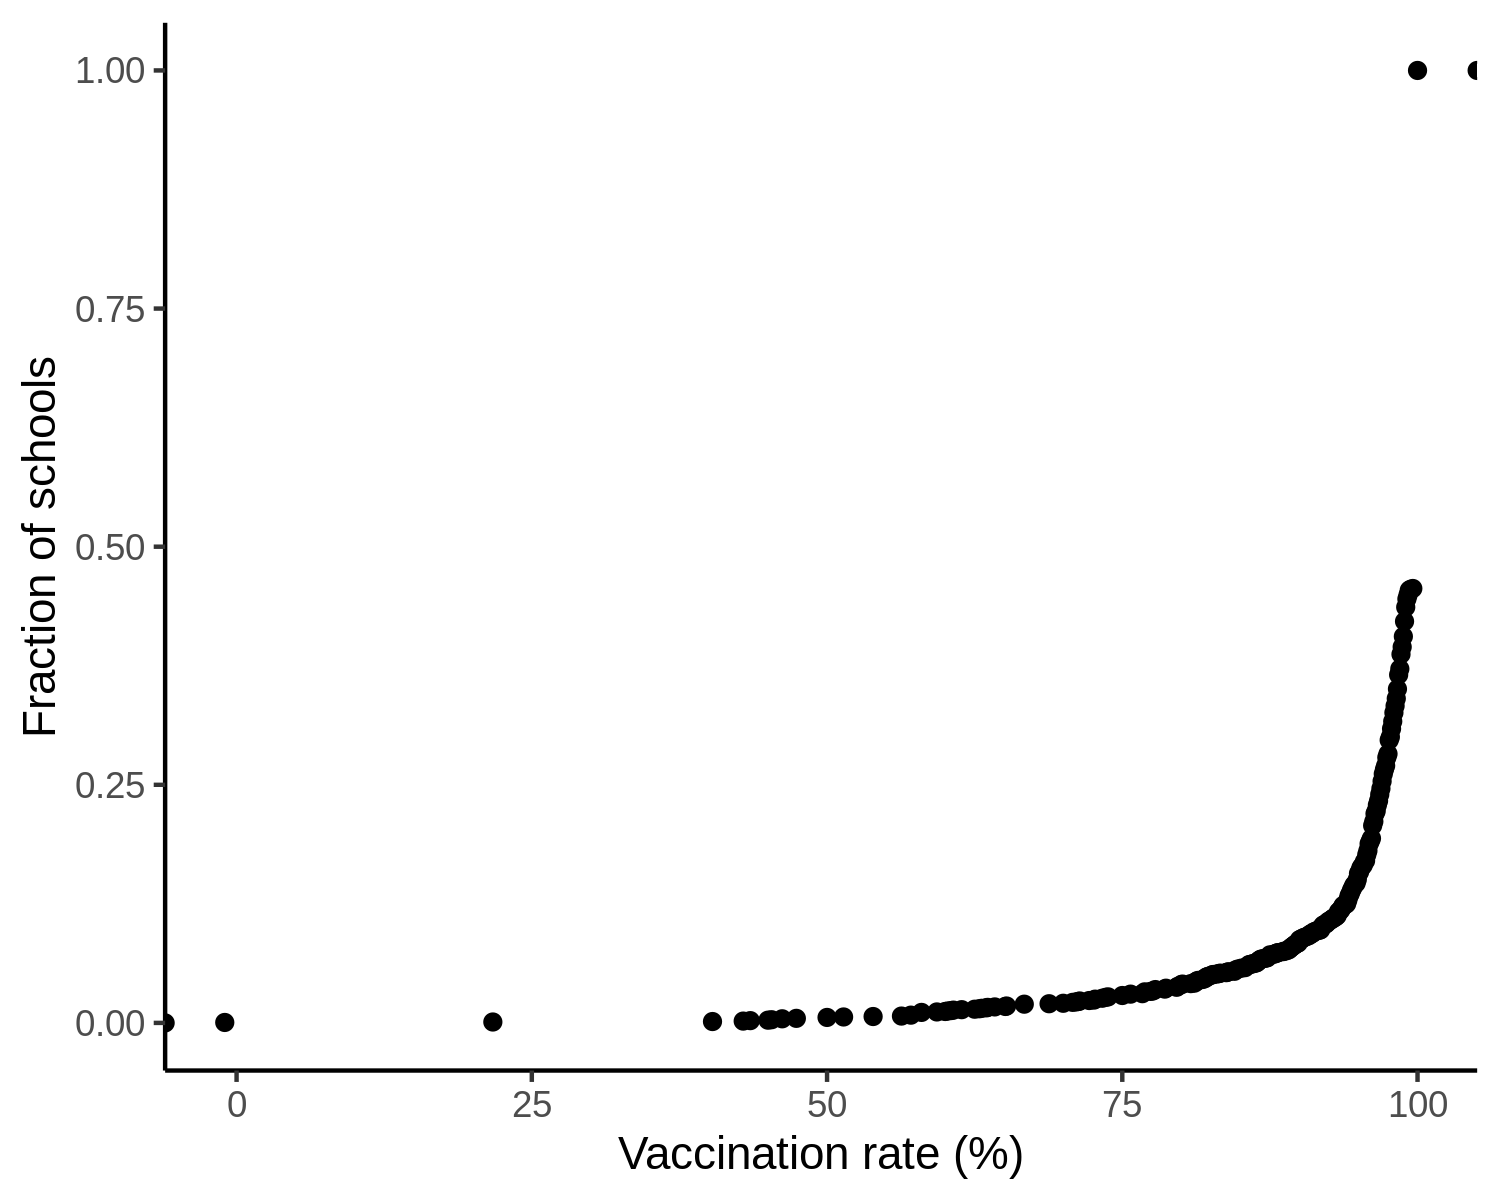

In [20]:
ggplot(vacc_NC, aes(x= overall)) + stat_ecdf(geom = "point")+
labs(x = "Vaccination rate (%)", y="Fraction of schools")+
theme_classic()

(My solution is below if you want to peek 👀. Uncomment the code, change the cell to `markdown`, and exectute it.)

![](https://github.com/chuckpr/BIOS512/blob/main/assignments/measles-chart.png?raw=true)

Is the median vaccination rate for NC schools above the CDC recommended target?

In [42]:
median.NC  = measles |> 
    group_by(state) |>
   filter(state == 'North Carolina') |> 
    summarize(median.vacc.rate = median(overall)) 
median.NC |> head()

state,median.vacc.rate
<chr>,<dbl>
North Carolina,100
